In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn
import re
import string
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
import nltk
from wordcloud import WordCloud

In [2]:
text = pd.read_csv('C:\\Users\\Sambhu\\Desktop\\LDA Document 1.csv', encoding='latin-1')

In [3]:
text.sample(2)

,Document,Editorial
3,4,If the outcome of the war could be determined ...
1,2,"Russia?s full-scale invasion of Ukraine, which..."


In [4]:
text_1 = [line.strip() for line in text['Editorial']]

In [5]:
chunk = text_1.copy()

In [6]:
chunk = [line.strip() for line in chunk]

In [7]:
print(chunk)

['The shock of Russia?s full-scale invasion has been replaced, one year on, by horror at the toll that it has taken on Ukraine. Tens of thousands of lives have been lost, including those of civilians; tens of thousands have been injured, and more bear psychological scars. The country?s infrastructure has been pulverised. In September, an estimate suggested that rebuilding Ukraine would cost upwards of $349bn, a figure that will have risen sharply. Millions have fled their homes and often their country too.\n\nThe reverberations of Vladimir Putin?s attack have been felt, too, far beyond its borders. This illegal act of aggression has entrenched a growing food crisis, claiming more lives and threatening stability in other nations. Its reshaping of international relations will define the decades to come.\n\n?The whole world faced a test for the age,? Joe Biden said in Warsaw this week. ?The world would not look the other way.? The west rightly threw its weight behind Ukraine. Mr Putin did

In [8]:
chunk_2 = ' '.join(chunk)

In [9]:
chunk_2

'The shock of Russia?s full-scale invasion has been replaced, one year on, by horror at the toll that it has taken on Ukraine. Tens of thousands of lives have been lost, including those of civilians; tens of thousands have been injured, and more bear psychological scars. The country?s infrastructure has been pulverised. In September, an estimate suggested that rebuilding Ukraine would cost upwards of $349bn, a figure that will have risen sharply. Millions have fled their homes and often their country too.\n\nThe reverberations of Vladimir Putin?s attack have been felt, too, far beyond its borders. This illegal act of aggression has entrenched a growing food crisis, claiming more lives and threatening stability in other nations. Its reshaping of international relations will define the decades to come.\n\n?The whole world faced a test for the age,? Joe Biden said in Warsaw this week. ?The world would not look the other way.? The west rightly threw its weight behind Ukraine. Mr Putin did 

In [10]:
clean_data1 = chunk_2.lower()

In [11]:
clean_data2 = re.sub(r'[^\w\s]','',clean_data1) #r'[^\w\s]' matches any character that is not a word character (\w) or whitespace character (\s)

In [12]:
clean_data2

'the shock of russias fullscale invasion has been replaced one year on by horror at the toll that it has taken on ukraine tens of thousands of lives have been lost including those of civilians tens of thousands have been injured and more bear psychological scars the countrys infrastructure has been pulverised in september an estimate suggested that rebuilding ukraine would cost upwards of 349bn a figure that will have risen sharply millions have fled their homes and often their country too\n\nthe reverberations of vladimir putins attack have been felt too far beyond its borders this illegal act of aggression has entrenched a growing food crisis claiming more lives and threatening stability in other nations its reshaping of international relations will define the decades to come\n\nthe whole world faced a test for the age joe biden said in warsaw this week the world would not look the other way the west rightly threw its weight behind ukraine mr putin did not expect the full scale of sa

In [13]:
clean_data3 = re.sub(r'\d+',' ', clean_data2) #cleaning digits

In [14]:
# StopWords

In [15]:
stopwords = set(stopwords.words('english'))

In [16]:
# We will remove stopwords and seperate the words

In [17]:
tokens = word_tokenize(clean_data3)

In [18]:
tokens

['the',
 'shock',
 'of',
 'russias',
 'fullscale',
 'invasion',
 'has',
 'been',
 'replaced',
 'one',
 'year',
 'on',
 'by',
 'horror',
 'at',
 'the',
 'toll',
 'that',
 'it',
 'has',
 'taken',
 'on',
 'ukraine',
 'tens',
 'of',
 'thousands',
 'of',
 'lives',
 'have',
 'been',
 'lost',
 'including',
 'those',
 'of',
 'civilians',
 'tens',
 'of',
 'thousands',
 'have',
 'been',
 'injured',
 'and',
 'more',
 'bear',
 'psychological',
 'scars',
 'the',
 'countrys',
 'infrastructure',
 'has',
 'been',
 'pulverised',
 'in',
 'september',
 'an',
 'estimate',
 'suggested',
 'that',
 'rebuilding',
 'ukraine',
 'would',
 'cost',
 'upwards',
 'of',
 'bn',
 'a',
 'figure',
 'that',
 'will',
 'have',
 'risen',
 'sharply',
 'millions',
 'have',
 'fled',
 'their',
 'homes',
 'and',
 'often',
 'their',
 'country',
 'too',
 'the',
 'reverberations',
 'of',
 'vladimir',
 'putins',
 'attack',
 'have',
 'been',
 'felt',
 'too',
 'far',
 'beyond',
 'its',
 'borders',
 'this',
 'illegal',
 'act',
 'of',
 '

In [19]:
lemmatizer = WordNetLemmatizer()

In [20]:
clean_data4 = [[lemmatizer.lemmatize(i) for i in tokens if not i in stopwords]]

In [21]:
clean_data4

[['shock',
  'russia',
  'fullscale',
  'invasion',
  'replaced',
  'one',
  'year',
  'horror',
  'toll',
  'taken',
  'ukraine',
  'ten',
  'thousand',
  'life',
  'lost',
  'including',
  'civilian',
  'ten',
  'thousand',
  'injured',
  'bear',
  'psychological',
  'scar',
  'country',
  'infrastructure',
  'pulverised',
  'september',
  'estimate',
  'suggested',
  'rebuilding',
  'ukraine',
  'would',
  'cost',
  'upwards',
  'bn',
  'figure',
  'risen',
  'sharply',
  'million',
  'fled',
  'home',
  'often',
  'country',
  'reverberation',
  'vladimir',
  'putin',
  'attack',
  'felt',
  'far',
  'beyond',
  'border',
  'illegal',
  'act',
  'aggression',
  'entrenched',
  'growing',
  'food',
  'crisis',
  'claiming',
  'life',
  'threatening',
  'stability',
  'nation',
  'reshaping',
  'international',
  'relation',
  'define',
  'decade',
  'come',
  'whole',
  'world',
  'faced',
  'test',
  'age',
  'joe',
  'biden',
  'said',
  'warsaw',
  'week',
  'world',
  'would',
 

In [22]:
import pyLDAvis
import pyLDAvis.gensim_models
import pickle
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess

C:\Anaconda\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [23]:
id2word = corpora.Dictionary(clean_data4)

In [24]:
corpus = [id2word.doc2bow(text) for text in clean_data4]

In [25]:
id2word

In [26]:
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 2),
  (6, 2),
  (7, 1),
  (8, 4),
  (9, 1),
  (10, 2),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 2),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 2),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 2),
  (26, 5),
  (27, 1),
  (28, 3),
  (29, 2),
  (30, 1),
  (31, 1),
  (32, 2),
  (33, 2),
  (34, 4),
  (35, 1),
  (36, 1),
  (37, 2),
  (38, 4),
  (39, 7),
  (40, 1),
  (41, 4),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 2),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 2),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 2),
  (66, 3),
  (67, 1),
  (68, 1),
  (69, 2),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 3),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 2),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 1),
  (90, 4),
  (91, 1)

In [27]:
from pprint import pprint

In [28]:
num_topics = 20

lda_model = gensim.models.LdaMulticore(corpus = corpus, id2word=id2word, num_topics = num_topics)

In [29]:
pprint(lda_model.print_topics())

[(0,
  '0.012*"ukraine" + 0.011*"russia" + 0.010*"war" + 0.009*"europe" + '
  '0.006*"ukrainian" + 0.005*"european" + 0.005*"putin" + 0.005*"would" + '
  '0.004*"eu" + 0.004*"u"'),
 (1,
  '0.013*"ukraine" + 0.011*"war" + 0.008*"europe" + 0.007*"russia" + '
  '0.007*"european" + 0.007*"ukrainian" + 0.006*"putin" + 0.006*"would" + '
  '0.006*"u" + 0.005*"country"'),
 (2,
  '0.011*"ukraine" + 0.007*"war" + 0.007*"russia" + 0.006*"european" + '
  '0.006*"europe" + 0.005*"putin" + 0.004*"ukrainian" + 0.004*"would" + '
  '0.004*"country" + 0.003*"u"'),
 (3,
  '0.016*"ukraine" + 0.008*"europe" + 0.007*"war" + 0.006*"russia" + '
  '0.006*"european" + 0.005*"ukrainian" + 0.005*"u" + 0.005*"western" + '
  '0.004*"would" + 0.004*"putin"'),
 (4,
  '0.018*"ukraine" + 0.010*"russia" + 0.009*"war" + 0.009*"europe" + '
  '0.007*"european" + 0.007*"ukrainian" + 0.006*"u" + 0.005*"country" + '
  '0.005*"would" + 0.005*"west"'),
 (5,
  '0.014*"ukraine" + 0.009*"europe" + 0.008*"war" + 0.008*"european" + 

In [30]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds="mmds", R=20)
vis

C:\Anaconda\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x             y  topics  cluster       Freq
topic                                                    
6      0.000353  4.330861e-03       1        1  99.954056
0      0.000393 -7.570708e-04       2        1   0.002418
11     0.000254  1.353311e-03       3        1   0.002418
18    -0.001473  6.058849e-04       4        1   0.002418
17    -0.001035  6.097105e-04       5        1   0.002418
16     0.001086  2.758101e-03       6        1   0.002418
15     0.002431 -8.739223e-04       7        1   0.002418
14    -0.000686  8.716371e-06       8        1   0.002418
13     0.001722  1.417570e-03       9        1   0.002418
12    -0.003576 -2.573891e-03      10        1   0.002418
10    -0.000819 -3.374155e-04      11        1   0.002418
1      0.001992  3.596486e-04      12        1   0.002418
9     -0.003561 -6.686746e-04      13        1   0.002418
8     -0.000133 -1.686362e-03      14        1   0.002418
7      0.002124 -4.328340e-04      15        1   0.002418
5      0.000714  5.681682e-07      16        1   0.002418
4      0.002825  2.420205e-03      17        1   0.002418
3      0.000899 -1.700060e-03      18        1   0.002418
2     -0.001201 -1.778025e-03      19        1   0.002418
19    -0.002309 -3.056320e-03      20        1   0.002418, topic_info=          Term       Freq      Total Category  logprob  loglift
1110   ukraine  34.000000  34.000000  Default  20.0000  20.0000
1156       war  25.000000  25.000000  Default  19.0000  19.0000
912     russia  24.000000  24.000000  Default  18.0000  18.0000
357     europe  23.000000  23.000000  Default  17.0000  17.0000
358   european  16.000000  16.000000  Default  16.0000  16.0000
...        ...        ...        ...      ...      ...      ...
355         eu   0.000129   8.339598  Topic20  -5.9861  -0.4456
628       many   0.000124   8.383348  Topic20  -6.0235  -0.4882
39        also   0.000112   6.206642  Topic20  -6.1264  -0.2905
406       flag   0.000116   7.281602  Topic20  -6.0938  -0.4176
913    russian   0.000117   8.805869  Topic20  -6.0882  -0.6020

[1039 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
8         1  1.027676          across
11        1  0.990776        actively
12        1  0.952644        activist
14        1  1.004399  administration
17        1  1.027411       aeroplane
...     ...       ...             ...
1186      1  0.950424            word
1187      1  0.966042           world
1189      1  0.972917           would
1191      1  0.978825            year
1193      1  0.972090             yet

[236 rows x 3 columns], R=20, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 1, 12, 19, 18, 17, 16, 15, 14, 13, 11, 2, 10, 9, 8, 6, 5, 4, 3, 20])

In [31]:
string = ' '.join(clean_data4[0])

In [32]:
string

'shock russia fullscale invasion replaced one year horror toll taken ukraine ten thousand life lost including civilian ten thousand injured bear psychological scar country infrastructure pulverised september estimate suggested rebuilding ukraine would cost upwards bn figure risen sharply million fled home often country reverberation vladimir putin attack felt far beyond border illegal act aggression entrenched growing food crisis claiming life threatening stability nation reshaping international relation define decade come whole world faced test age joe biden said warsaw week world would look way west rightly threw weight behind ukraine mr putin expect full scale sanction hit russia breadth condemnation thursday un general assembly expected pas another resolution demanding russia unconditional withdrawal overwhelming majority yet never initially portrayed simply story russia rest even many west still believe emergence bipolar world west allied democracy face chineserussian bloc sinorus

In [39]:
words_dict = {}
for word in string.split():
    words_dict[word] = words_dict.get(word, 0)+1
for key in sorted(words_dict, key=lambda x: words_dict[x], reverse=True):
    print("{}:{}".format(key, words_dict[key]))

ukraine:42
war:28
russia:27
europe:27
european:19
ukrainian:17
would:15
putin:15
u:14
country:13
western:13
west:12
many:12
poland:11
eu:10
political:10
world:9
future:9
eastern:9
russian:9
victory:9
time:9
year:8
people:8
flag:8
border:7
china:7
also:7
price:7
power:7
security:7
may:7
peace:7
could:7
maidan:7
fear:7
invasion:6
yet:6
even:6
still:6
democracy:6
military:6
outcome:6
second:6
death:6
today:6
one:5
life:5
beyond:5
international:5
relation:5
despite:5
leader:5
support:5
much:5
conflict:5
ago:5
nato:5
strategic:5
long:5
place:5
want:5
horror:4
lost:4
far:4
week:4
believe:4
take:4
south:4
point:4
ally:4
given:4
seems:4
american:4
back:4
must:4
president:4
living:4
nuclear:4
genocide:4
kyiv:4
last:4
already:4
clear:4
germany:4
across:4
idea:4
since:4
union:4
mean:4
region:4
first:4
risk:4
geopolitical:4
fullscale:3
taken:3
thousand:3
civilian:3
psychological:3
million:3
often:3
attack:3
biden:3
look:3
scale:3
un:3
expected:3
interest:3
india:3
global:3
soviet:3
probably:3
end:

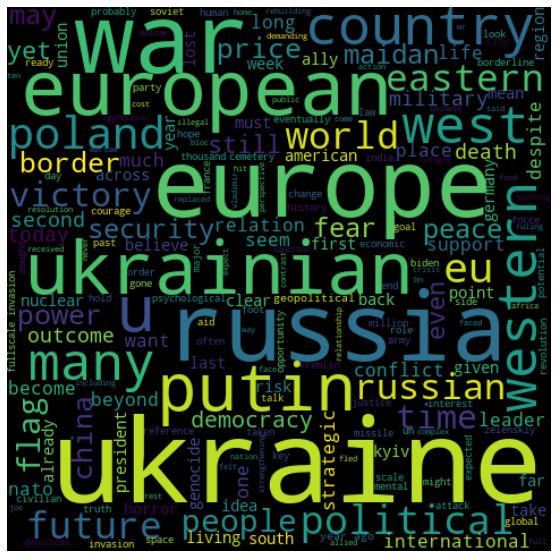

In [34]:
# Create word Cloud

wordcloud = WordCloud(width=480, height=480, margin=0).generate(string)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()

In [35]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [36]:
scores = analyzer.polarity_scores(string)

In [37]:
print(scores)

{'neg': 0.191, 'neu': 0.635, 'pos': 0.174, 'compound': -0.9972}
